In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data from csv file skip first 2 rows and last 2 rows and first 2 columns

data2 = pd.read_csv("../data/which_social_media_platforms_are_most_popular_data_2024-01-31.csv"
                    ,skiprows=2
                    ,skipfooter=3)
data2.head()

/var/folders/mg/xcxdf8ds5751wpt36mw0qmrm0000gn/T/ipykernel_66974/1884407188.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data2 = pd.read_csv("../data/which_social_media_platforms_are_most_popular_data_2024-01-31.csv"


,\t\t\tYear,YouTube,Facebook,Instagram,Pinterest,TikTok,LinkedIn,WhatsApp,Snapchat,Twitter (X),Reddit,BeReal,Nextdoor
0,\t\t8/5/2012,NaN,54%,9%,10%,NaN,16%,NaN,NaN,13%,NaN,NaN,NaN
1,\t\t8/7/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14%,NaN,NaN,NaN
2,\t\t12/9/2012,NaN,NaN,11%,13%,NaN,NaN,NaN,NaN,13%,NaN,NaN,NaN
3,\t\t12/16/2012,NaN,57%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\t\t5/19/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15%,NaN,NaN,NaN


In [3]:
# data clean replace the special characters \t from the column names and replace the special characters \t from the data
data2.columns = data2.columns.str.replace('\t','')
data2 = data2.replace('\t','')
data2.head()

,Year,YouTube,Facebook,Instagram,Pinterest,TikTok,LinkedIn,WhatsApp,Snapchat,Twitter (X),Reddit,BeReal,Nextdoor
0,\t\t8/5/2012,NaN,54%,9%,10%,NaN,16%,NaN,NaN,13%,NaN,NaN,NaN
1,\t\t8/7/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14%,NaN,NaN,NaN
2,\t\t12/9/2012,NaN,NaN,11%,13%,NaN,NaN,NaN,NaN,13%,NaN,NaN,NaN
3,\t\t12/16/2012,NaN,57%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\t\t5/19/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15%,NaN,NaN,NaN


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         16 non-null     object
 1   YouTube      4 non-null      object
 2   Facebook     10 non-null     object
 3   Instagram    10 non-null     object
 4   Pinterest    10 non-null     object
 5   TikTok       2 non-null      object
 6   LinkedIn     9 non-null      object
 7   WhatsApp     4 non-null      object
 8   Snapchat     4 non-null      object
 9   Twitter (X)  15 non-null     object
 10  Reddit       3 non-null      object
 11  BeReal       1 non-null      object
 12  Nextdoor     1 non-null      object
dtypes: object(13)
memory usage: 1.8+ KB


In [5]:
# change the data type of the columns
# convert the Year column to datetime
data2['Year'] = pd.to_datetime(data2['Year'])

# convert the columns to numeric 
for i in data2.columns[1:]:
    data2[i] = data2[i].str.replace('%','').astype(float)/100



In [6]:
data2.tail()

,Year,YouTube,Facebook,Instagram,Pinterest,TikTok,LinkedIn,WhatsApp,Snapchat,Twitter (X),Reddit,BeReal,Nextdoor
11,2016-04-04,NaN,0.68,0.28,0.26,NaN,0.25,NaN,NaN,0.21,NaN,NaN,NaN
12,2018-01-10,0.73,0.68,0.35,0.29,NaN,0.25,0.22,0.27,0.24,NaN,NaN,NaN
13,2019-02-07,0.73,0.69,0.37,0.28,NaN,0.27,0.20,0.24,0.22,0.11,NaN,NaN
14,2021-02-08,0.81,0.69,0.40,0.31,0.21,0.28,0.23,0.25,0.23,0.18,NaN,0.13
15,2023-09-05,0.83,0.68,0.47,0.35,0.33,0.30,0.29,0.27,0.22,0.22,0.03,NaN


In [7]:
# 使用所有平台
selected_platforms = list(data2.columns[1:])  # 所有平台

# 筛选数据
df = data2[['Year'] + selected_platforms]

# 将数据从宽表转换为长表
df_melted = df.melt(id_vars='Year', value_vars=selected_platforms, var_name='Platform', value_name='Usage')
df_melted.head()

,Year,Platform,Usage
0,2012-08-05,YouTube,NaN
1,2012-08-07,YouTube,NaN
2,2012-12-09,YouTube,NaN
3,2012-12-16,YouTube,NaN
4,2013-05-19,YouTube,NaN


In [8]:
# return the unique values of the Year of the first date
x_l = list(data2['Year'].dt.to_period('Y').dt.start_time.unique())
x_ll = list(data2['Year'].dt.to_period('Y').dt.start_time.unique().strftime('%Y'))
x_lll = ["2014","2016","2018","2020","2023"]

In [9]:
colors = ['#BF3927', '#006699', '#9DAECB', '#D6DAB3', '#949D48', '#A55A26', '#F1E4C1', '#F6EDD6', '#733D47', '#DCCFD1', '#DE996B', '#976E75']

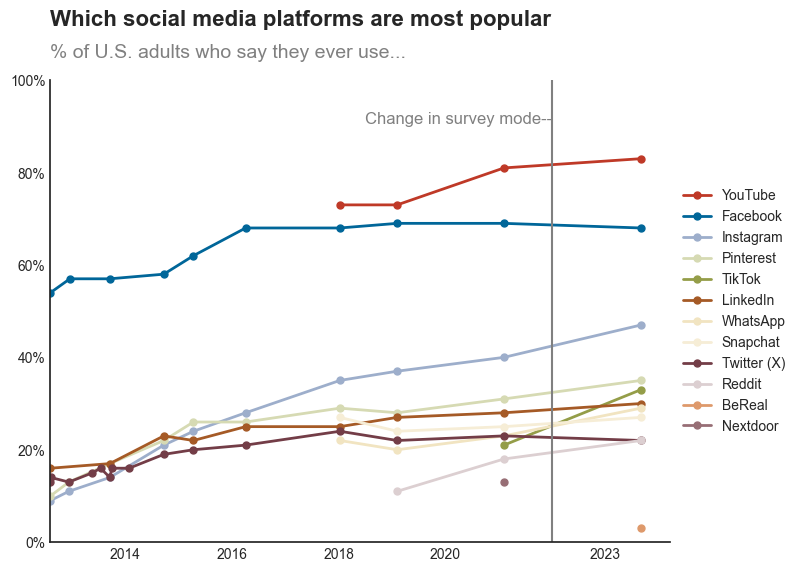

In [10]:
import matplotlib.pyplot as plt
# 默认字体为times new roman
plt.rcParams['font.family'] = 'Helvetica'
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 6))
# for i in data2.columns[1:]:
#     ax.plot(data2['Year'], data2[i], label = i, marker = 'o')
color_cycle = plt.cycler(color=colors)
ax.set_prop_cycle(color_cycle)
for column in data2.columns[1:]:
    # Convert Year to datetime if it's not already
    x = pd.to_datetime(data2['Year'])
    y = data2[column]
    
    # Remove NaN values for proper interpolation
    mask = ~y.isna()
    if mask.any():  # Only plot if there are non-NaN values
        # Plot with interpolation
        ax.plot(x[mask], y[mask], label=column, marker='o', 
                linestyle='-', # solid line
                linewidth=2,   # slightly thicker lines
                markersize=5)  # smaller markers for cleaner look
# add a auxiliary line in 2021 year
ax.axvline(x=pd.to_datetime('2022-01-01'), color='grey', linestyle='-')
# add a text in the auxiliary line
ax.text(pd.to_datetime('2022-01-01'), .9, 'Change in survey mode--', color='grey', fontsize=12, va='bottom',ha='right')
# set legend on the center left side outside the plot

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
# set the x axis start from 2010
plt.xlim(data2.Year.min())
# Ensure the y-axis ranges from 0 to 1
ax.set_ylim(0, 1)  
# remove the frame of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# set the y axis present as percentage from 0% to 100%
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
# Set the title
ax.set_title('Which social media platforms are most popular', fontsize=16, fontweight='bold',y = 1.1,loc = "left",x=0)

# Add subtitle
ax.text(0, 1.05, '% of U.S. adults who say they ever use...', fontsize=14, ha='left', transform=ax.transAxes,color='grey')
ax.set_xticks(x_lll)
ax.set_xticklabels(x_lll)
plt.show()
    